<a href="https://colab.research.google.com/github/jtneumann/DeepLearningWithPython/blob/master/6.2b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.layers import LSTM

Using TensorFlow backend.


In [0]:
import keras

In [4]:
keras.__version__

'2.2.4'

In [0]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense

In [0]:
max_features = 10000

In [0]:
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))


In [20]:
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000
maxlen = 500
batch_size = 32

print('Loading Data....')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)

print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')

print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape: ', input_train.shape)
print('input_test shape: ', input_test.shape)

Loading Data....
17465344/17464789 [==============================] - 2s 0us/step
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
input_train shape:  (25000, 500)
input_test shape:  (25000, 500)


In [0]:
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['acc'])

In [28]:
history = model.fit(input_train, y_train,
                   epochs=20,
                   batch_size=128,
                   validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/20
20000/20000 [==============================] - 104s 5ms/step - loss: 0.1055 - acc: 0.9636 - val_loss: 0.3624 - val_acc: 0.8834
Epoch 2/20
20000/20000 [==============================] - 104s 5ms/step - loss: 0.0981 - acc: 0.9666 - val_loss: 0.3524 - val_acc: 0.8630
Epoch 3/20
20000/20000 [==============================] - 103s 5ms/step - loss: 0.0907 - acc: 0.9694 - val_loss: 0.3551 - val_acc: 0.8722
Epoch 4/20
20000/20000 [==============================] - 100s 5ms/step - loss: 0.0846 - acc: 0.9702 - val_loss: 0.3776 - val_acc: 0.8762
Epoch 5/20
20000/20000 [==============================] - 100s 5ms/step - loss: 0.0813 - acc: 0.9739 - val_loss: 0.9791 - val_acc: 0.7528
Epoch 6/20
20000/20000 [==============================] - 102s 5ms/step - loss: 0.0754 - acc: 0.9748 - val_loss: 0.4548 - val_acc: 0.8798
Epoch 7/20
20000/20000 [==============================] - 100s 5ms/step - loss: 0.0699 - acc: 0.9772 - val_loss: 0.4101 - v

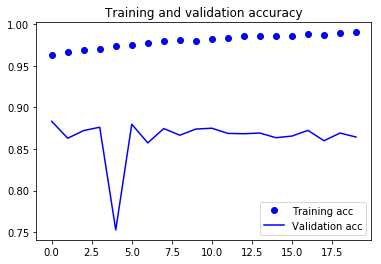

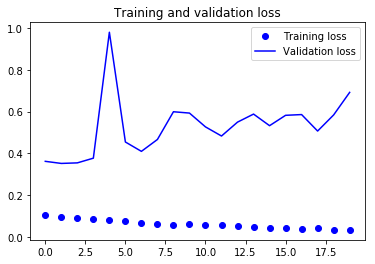

In [29]:

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()